**Problem 1: (5/15)**


![](https://drive.google.com/uc?export=view&id=1WWYwl0hGxXG5D0Qg1TDULe87pfS5stRl)

Plot a fitted line and original points. Also print out the modulus of elasticity. Test out 3 different functions.

<ipython-input-45-80911f382b6b>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  Para,Cov= curve_fit(Fit_func,x,y)


Square error of each function is [ 555.22864661  540.04175706  949.9439606  2243.10199332]


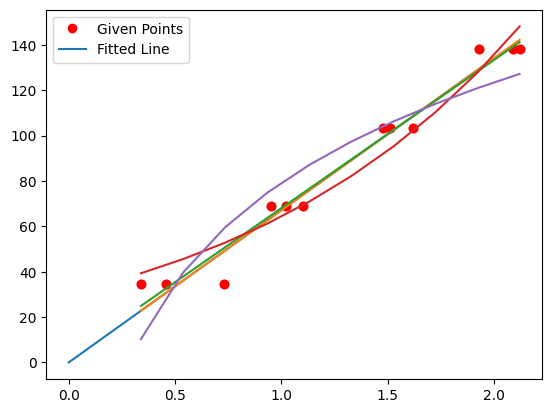

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func_1_original(x,a,b,c):
  return x/((a+b+c)/3) #modulus of elasticity

x=np.array([0.46,0.95,1.48,1.93,0.34,1.02,1.51,2.09,0.73,1.10,1.62,2.12])
y=np.array([34.5,69.0,103.5,138.0,34.5,69.0,103.5,138.0,34.5,69.0,103.5,138.0])
plt.plot(x,y,'ro') #plot original points

Para,Cov = curve_fit(func_1_original,x,y)
x_plot=np.arange(0,2.5,1)
plt.plot(x_plot,func_1_original(x_plot, *Para), '-')     #fitted line
plt.legend(['Given Points','Fitted Line'],loc='best')

#testing 3 different functions
def func_2_linear(x,a,b,c):
  return a*x+b

def func_3_exp(x,a,b):
  return a*np.exp(b*x)

def func_4_log(x,a,b):
  return a*np.log(x)+b

error=np.zeros(4)
plt.plot(x,y,'ro')
x_plot=np.linspace(min(x), max(x), 10)
for i,Fit_func in enumerate ([func_1_original, func_2_linear, func_3_exp, func_4_log]):
  Para,Cov= curve_fit(Fit_func,x,y)
  error[i]=np.dot(Fit_func(x, *Para)-y,Fit_func(x,*Para)-y)
  plt.plot(x_plot,Fit_func(x_plot,*Para))   #square error
print('Square error of each function is',error)

**Problem 2: (5/15)**

![](https://drive.google.com/uc?export=view&id=12T5Y48joqHwUxKJywx61ENslqz0yfPB3)

Plot out the original data, interpolated curve, and print and plot out the value at T=10, 30, 60, and 90 C. Test out 3 different interpolations.



BC as Natural, T = 10, uk = 1.4749813318705263
BC as Clamped, T = 20, uk = 0.851009510563939
BC as NotKnot, T = 60, uk = 0.45442948868770716
BC as Natural, T = 90, uk = 0.31945286124506


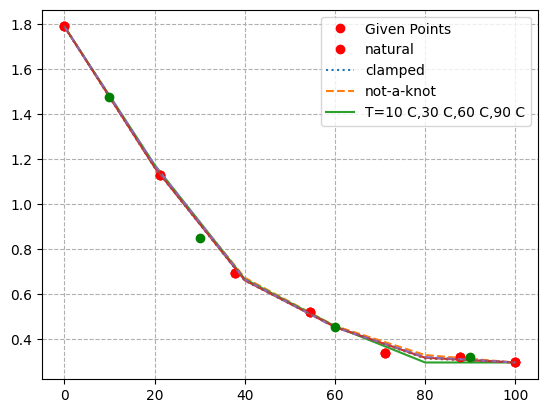

In [46]:
from scipy.interpolate import CubicSpline
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

#plot original data

x=np.array([0,21.1,37.8,54.4, 71.1, 87.8, 100])
y=np.array([1.79,1.13,0.696,0.519,0.338,0.321,0.296])

plt.plot(x,y,'ro')

#plot interpolated curve

f_quadratic=interpolate.interp1d(x,y,kind='quadratic', fill_value="extrapolate")
f_linear=interpolate.interp1d(x,y,kind='linear', fill_value="extrapolate")
f_lagrange=interpolate.lagrange(x,y)

x_new=np.arange(0,120,20)
plt.plot(x,y,'ro',x_new,f_quadratic(x_new),":", x_new,f_linear(x_new),"--",x_new,f_lagrange(x_new),"-")
plt.legend(['Data','Quadratic','Linear','Lagrange'],loc = 'best')

#print and plot out the value at T = 10,30,60, and 90 C

bc =['natural','clamped','not-a-knot','periodic']
f_natural = CubicSpline(x,y,bc_type='natural')
f_clamped = CubicSpline(x,y,bc_type='clamped')
f_NotKnot = CubicSpline(x,y,bc_type='not-a-knot')
#f_periodic = CubicSpline(x,y,bc_type='periodic')

x_v=np.arange(0,120,20)
plt.plot(x,y,'ro',x_v,f_natural(x_v), '-',x_v,f_clamped(x_v), '--',x_v,f_NotKnot(x_v),':')
plt.grid(ls='--')

print("BC as Natural, T = 10, uk =", f_natural(10))
print("BC as Clamped, T = 20, uk =", f_clamped(30))
print("BC as NotKnot, T = 60, uk =", f_NotKnot(60))
print("BC as Natural, T = 90, uk =", f_natural(90))
plt.plot([10,30,60,90],[f_natural(10), f_clamped(30), f_NotKnot(60), f_natural(90)], 'go')
plt.legend(['Given Points', 'natural','clamped','not-a-knot','T=10 C,30 C,60 C,90 C'], loc='best')


**Problem 3: (5/15)**

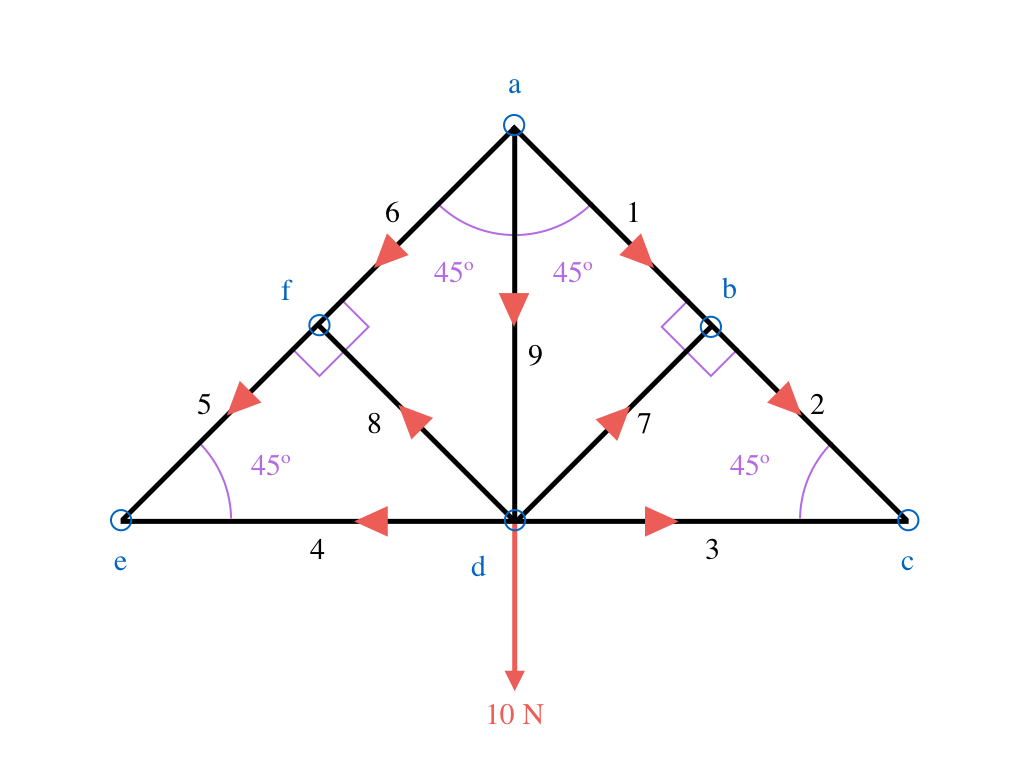

Use a, b, c, d, e and f joints to build your equations and find the loads on the truss members using numpy library.

In [47]:
import numpy as np

#cos(45) = 0.707
#sin(45) = 0.707

#Ax,F1 = 0.707, Ay,F1 = -0.707
#Ax,F6 = -0.707, Ay,F6 = -0.707
#Ax,F9 = 0, Ax, Ay,F9 = -1

#Bx,F1 = -0.707, By,F1 = 0.707
#Bx,F2 = 0.707, By,F2 = -0.707
#Bx,F7 = -0.707, By,F7 = -0.707

#Cx,F2 = -0.707, Cy,F2 = 0.707
#Cx,F3 = -1, Cy,F3 = 0

#Dx,F3 = 1, Dy,F3 = 0
#Dx,F4 = -1, Dy,F4 = 0
#Dx,F7 = 0.707, Dy,F7 = 0.707
#Dx,F8 = -0.707, Dy,F8 = 0.707
#Dx,F9 = 0, Dy,F9 = 1

#Ex,F4 = 1, Ey,F4 = 0
#Ex,F5 = 0.707, Ey,F5 = 0.707

#Fx,F5 = -0.707, Fy,F5 = -0.707
#Fx,F6 = 0.707, Fy,F6 = 0.707
#Fx,F8 = 0.707, Fy,F8 = -0.707

A=np.array([[0.707,0,0,0,0,-0.707,0,0,0,0,0,0],[-0.707,0,0,0,0,-0.707,0,0,-1,0,0,0], [-0.707,0.707,0,0,0,0,-0.707,0,0,0,0,0], [0.707,-0.707,0,0,0,0,-0.707,0,0,0,0,0],[0,-0.707,-1,0,0,0,0,0,0,0,0,0], [0,0.707,0,0,0,0,0,0,0,0,0,1], [0,0,1,-1,0,0,0.707,-0.707,0,0,0,0], [0,0,0,0,0,0,0.707,0.707,1,0,0,0], [0,0,0,1,0.707,0,0,0,0,1,0,0], [0,0,0,0,0.707,0,0,0,0,0,1,0],[0,0,0,0,-0.707,0.707,0,0.707,0,0,0,0],[0,0,0,0,-0.707,0.707,0,-0.707,0,0,0,0]])
B =np.array([0,0,0,0,0,0,0,10,0,0,0,0])
X=np.linalg.solve(A,B)

print(X)







[-7.07213579e+00 -7.07213579e+00  5.00000000e+00  5.00000000e+00
 -7.07213579e+00 -7.07213579e+00 -5.55279207e-16 -2.78946572e-31
  1.00000000e+01  2.35549439e-15  5.00000000e+00  5.00000000e+00]
